<a href="https://colab.research.google.com/github/keerthn123/Health-Insurance-Charge-Prediction/blob/main/Health_Insurance_Charge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Health Insurance  Charge Prediction model

- Using Linear Regression

## 📤 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model


## Check out the Data

In [ ]:
health_data = pd.read_csv("/content/insurance.csv")
print(health_data.head(10))
health_data.shape

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


(1338, 7)

## Check null entries

In [ ]:
health_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Converting categorical data into integer values. 

In [ ]:

gender_mapping={'male':1,'female':2}
smoker_mapping={'yes':1,'no':0}
region_mapping={'northeast':1,'southeast':2,'southwest':3,'northwest':4}
health_data['sex']=health_data['sex'].map(gender_mapping)
health_data['smoker']=health_data['smoker'].map(smoker_mapping)
health_data['region']=health_data['region'].map(region_mapping)
health_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520
5,31,2,25.740,0,0,2,3756.62160
6,46,2,33.440,1,0,2,8240.58960
7,37,2,27.740,3,0,4,7281.50560
8,37,1,29.830,2,0,1,6406.41070
9,60,2,25.840,0,0,4,28923.13692


## PairPlot
Seaborn pairplot in Python is made when you want to visualize the relationship between two variables and variables. 

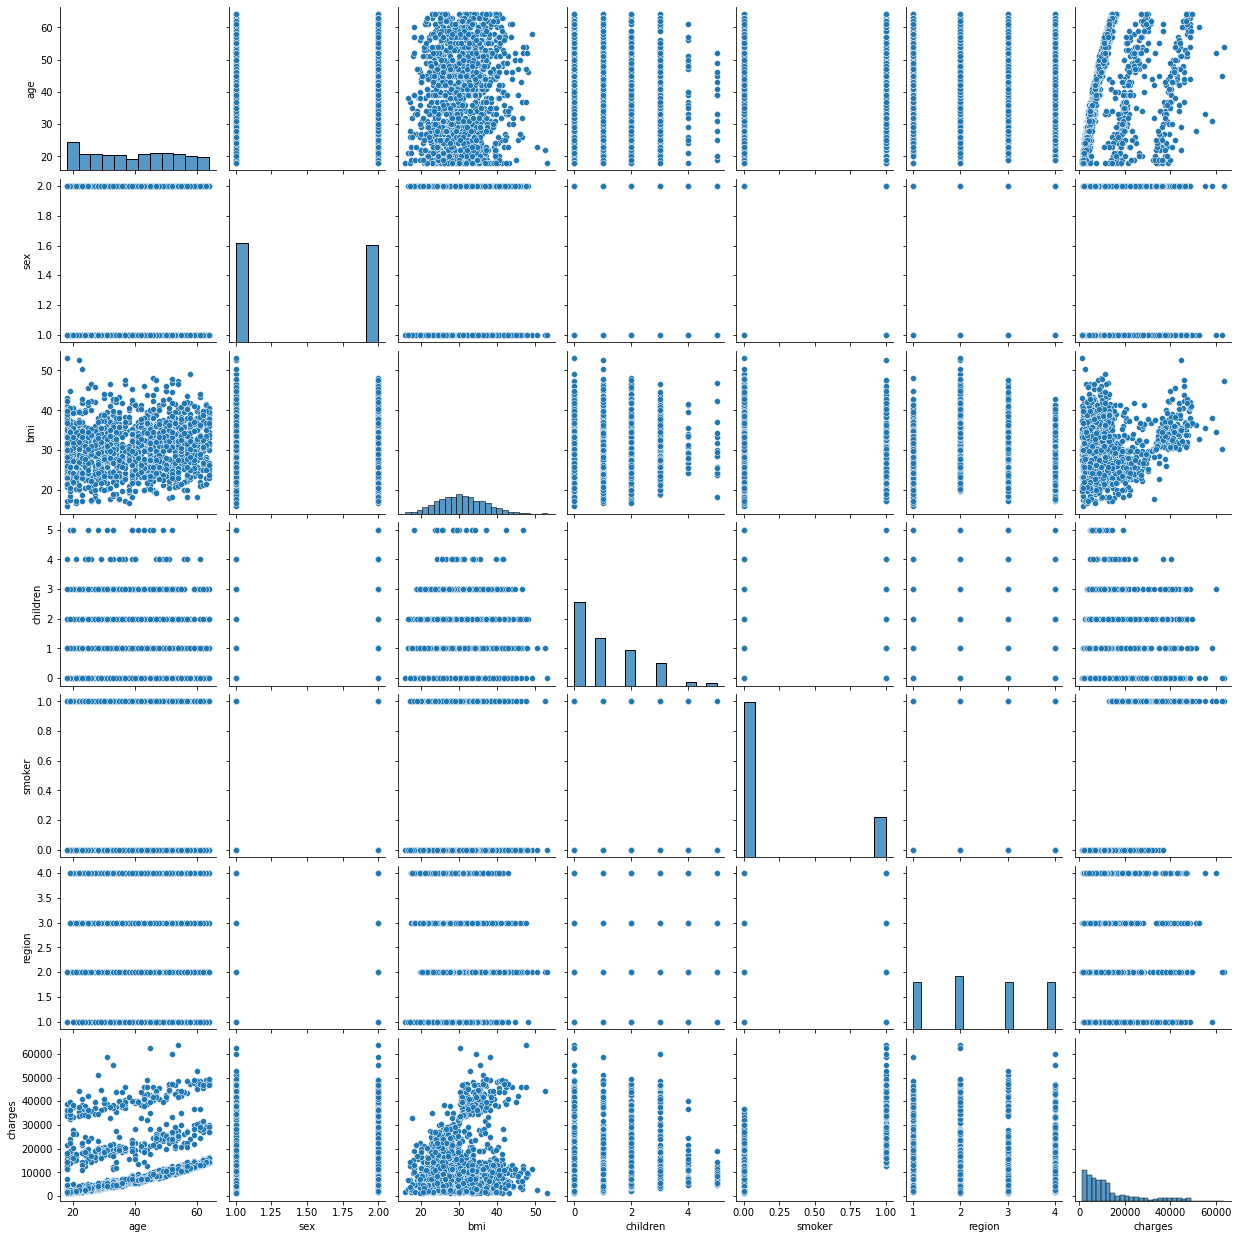

In [ ]:
sns.pairplot(health_data)

## Observing distplots and applying log transformation
### DistPlot
Seaborn distplot lets you show a histogram with a line on it. 
### Log Transformation
The log transformation reduces or removes the skewness of our original data. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


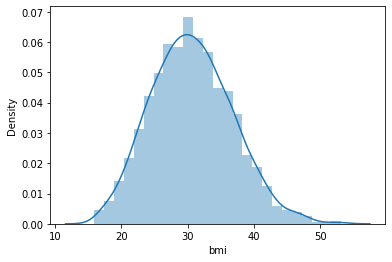

In [ ]:
# health_data['bmi_log'] = np.log(health_data['bmi']+1)
sns.distplot(health_data["bmi"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


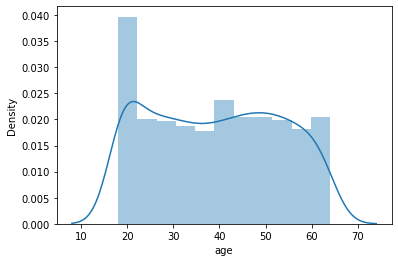

In [ ]:
# health_data['age'] = np.log(health_data['age']+1)
sns.distplot(health_data["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


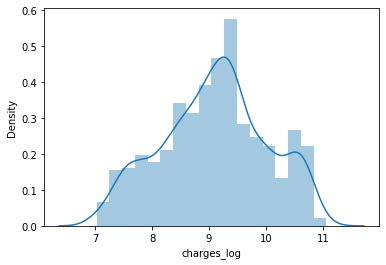

In [ ]:
health_data['charges_log'] = np.log(health_data['charges']+1)
sns.distplot(health_data["charges_log"])

## Printing corelation between charges and other values

In [ ]:
correlation=health_data.corr()
print(correlation['charges'].sort_values(ascending=False))



charges        1.000000
charges_log    0.892996
smoker         0.787251
age            0.299008
bmi            0.198341
children       0.067998
region        -0.050226
sex           -0.057292
Name: charges, dtype: float64


## HeatMapping
Purpose of Seaborn HeatMap The seaborn Heatmaps are the grid Heatmaps that can take various types of data and generate heatmaps. The primary purpose of the seaborn heatmap is to show the correlation matrix by data visualization\
**Lighter the color higher the value and more is the correlation between them**

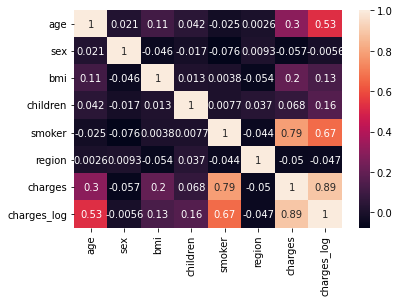

In [ ]:
sns.heatmap(health_data.corr(), annot=True)


## Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable.

In [ ]:
dataX,dataY=health_data[['age','bmi','sex','region','children','smoker']], health_data['charges_log']
# dataX,dataY=health_data[['age','bmi','sex','region','children','smoker']], health_data['charges']


##Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=42)

# Performance Evaluation
##sklearn.metrices
Sklearn metrics lets you implement scores, losses, and utility functions for evaluating performance. 

**Here are the key steps involved:**

-Load data;

-Split it into train set and test set;

-Build the training model;

-Make predictions or forecasts on the test data;

-Evaluate the machine learning model with a particular method.

###Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:


 
**Mean Squared Error (MSE)** is the mean of the squared errors


 
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors


 ### Comparing these metrics:

**MAE** is the easiest to understand, because it's the average error.

**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

##Cross Validation
**Cross-validation** is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. In **cross-validation**, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.


In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, dataX, dataY, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = linear_model.LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

#Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [ ]:
print("Intercept of Linear fit: ",lin_reg.intercept_)

Intercept of Linear fit:  6.91378499193158


In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, dataX.columns, columns=['Coefficient'])
coeff_df


,Coefficient
age,0.034650
bmi,0.011165
sex,0.072615
region,-0.016744
children,0.096483
smoker,1.548212


## Prediction from our model
Let's grab predictions off our test set and see how well it did!

In [ ]:
pred = lin_reg.predict(X_test)

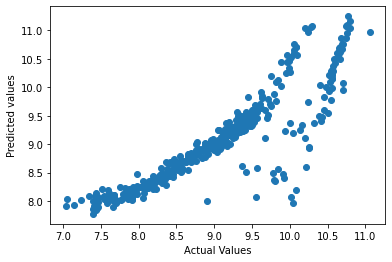

In [ ]:
chart=pd.DataFrame({'True Values': y_test, 'Predicted Values': pred})
x,y=chart['True Values'],chart['Predicted Values']
plt.scatter(x, y)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.show()

Residual Histogram


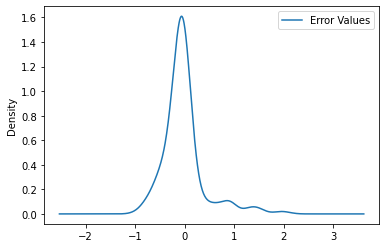

In [ ]:
pd.DataFrame({'Error Values': (y_test - pred)}).plot.kde()

##Evalution Results
**MAE** : Mean Absolute error\
**MSE** : Mean Squared Error\
**RMSE** : Root mean square error 

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.2698840894032185
MSE: 0.1836685659747899
RMSE: 0.42856570788478854
R2 Square 0.7805996611518236
__________________________________

Train set evaluation:
_____________________________________
MAE: 0.28638450209193445
MSE: 0.20594453635462198
RMSE: 0.453811124097484
R2 Square 0.7569934784816497
__________________________________


## Printing Results

In [ ]:

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(linear_model.LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.269884,0.183669,0.428566,0.7806,0.758305


##Accuracy Score


In [ ]:
acc= lin_reg.score(X_train,y_train)*100
print("The model accuracy (Linear Regression): ",acc)

The model accuracy (Linear Regression):  75.69934784816496


In [ ]:
print("Weights: ",lin_reg.coef_)
print("Intercepts: ",lin_reg.intercept_)
wt=list(lin_reg.coef_)
print(wt)
wt=[lin_reg.intercept_]+wt
print(wt)
wt=np.array([wt])
print(wt)
print(wt.shape)

Weights:  [ 0.03464997  0.01116519  0.07261456 -0.01674442  0.09648312  1.54821199]
Intercepts:  6.91378499193158
[0.03464996540481971, 0.011165190465997224, 0.07261456211154073, -0.016744423237586927, 0.0964831171385445, 1.5482119925931843]
[6.91378499193158, 0.03464996540481971, 0.011165190465997224, 0.07261456211154073, -0.016744423237586927, 0.0964831171385445, 1.5482119925931843]
[[ 6.91378499  0.03464997  0.01116519  0.07261456 -0.01674442  0.09648312
   1.54821199]]
(1, 7)


# Health Insurance prediction
Applicant inputs his datas and the model predicts the Insurance charge.

In [ ]:
age=int(input("Enter age: "))
s=int(input("Enter sex ('male'->1,'female'->2): "))
bmi=float(input("Enter bmi: "))
c=int(input("Enter no. of children: "))
s=int(input("Does the person smoke('yes'->1,'no'->0): "))
re=int(input("Enter region number('northeast'->1,'southeast'->2,'southwest'->3,'northwest'->4): "))
var=np.array([1,age,bmi,s,re,c,s])
print(var.shape)
print(var)

Enter age: 19
Enter sex ('male'->1,'female'->2): 2
Enter bmi: 27.9
Enter no. of children: 0
Does the person smoke('yes'->1,'no'->0): 0
Enter region number('northeast'->1,'southeast'->2,'southwest'->3,'northwest'->4): 3
(7,)
[ 1.  19.  27.9  0.   3.   0.   0. ]


In [ ]:
print("The health Insurance Charge is:",np.exp(np.matmul(wt,var))[0])
price=np.matmul(wt,var)


The health Insurance Charge is: 2523.519615573321


***Reference***: https://medium.com/analytics-vidhya/simple-linear-regression-with-example-using-numpy-e7b984f0d15e

https://www.kaggle.com/faressayah/linear-regression-house-price-prediction/notebook#%E2%9C%94%EF%B8%8F-Artficial-Neural-Network

https://youtu.be/0Kha6KIto28

https://youtu.be/pfmJtWEMEpo

scikit learn Docs-https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

NumPy Docs-https://numpy.org/doc/stable/user/index.html#user

Pandas Docs- https://pandas.pydata.org/docs/user_guide/index.html#user-guide

***Dataset***: https://www.kaggle.com/annetxu/health-insurance-cost-predicition/data